# Scipy
Scipy fue el primer módulo consolidado para una amplia gama de librerías compiladas basado en matrices NumPy. Scipy incluye numerosas funciones especiales (por ejemplo, Airy, Bessel, elíptica, ...), así como potentes rutinas de cuadratura numérica a través del `QUAD-PACK` que es una librería de Fortran. Además, Scipy proporciona acceso a la librería `ODEPACK` para resolver ecuaciones diferenciales. Muchas funciones de estadística están incluidas y además generadores de números aleatorios y una amplia variedad de distribuciones de probabilidad en `scipy.statsmodule`. Interfaces librería de optimización en fortran `MINPACK` se proporciona a través de `scipy.optimize`. Métodos para la búsqueda de raíces, minimización y maximización de problemas, con y sin derivadas de orden superior. Los métodos de interpolación se proporcionan en el módulo `scipy.interpolate` a través del paquete `FITPACK` escrito en Fortran. 

Es importante tener en cuenta que algunos de los módulos son tan grandes que no los se obtienen todos con un `import scipy` porque tardaría demasiado en cargarse. Es posible que deban cargar algunos de estos paquetes de forma individual como por ejemplo `import scipy.interpolate`, algunos de estos llamados sub-paquetes son listados en la siguiente tabla.


| Nombre            | Descripción                            |
|-------------------|----------------------------------------|
| scipy.cluster     | Vector quantization / Kmeans           |
| scipy.constants   | Physical and mathematical constants    |
| scipy.fftpack     | Fourier transform                      |
| scipy.integrate   | Integration routines                   |
| scipy.interpolate | Interpolation                          |
| scipy.io          | Data input and output                  |
| scipy.linalg      | Linear algebra routines                |
| scipy.ndimage     | n-dimensional image package            |
| scipy.odr         | Orthogonal distance regression         |
| scipy.optimize    | Optimization                           |
| scipy.signal      | Signal processing                      |
| scipy.sparse      | Sparse matrices                        |
| scipy.spatial     | Spatial data structures and algorithms |
| scipy.special     | Any special mathematical functions     |
| scipy.stats       | Statistics                             |

La estructura de datos que se usa en Scipy es la de arreglos multidimensionales de NumPy.

## Clustering (scipy.cluster)

K-means clustering es un método para encontrar clusters y centroides.

El algoritmo de k-medias ajusta la clasificación de las observaciones en grupos y actualiza los centroides del grupo hasta que la posición de los centroides sea estable en iteraciones sucesivas. En esta implementación del algoritmo, la estabilidad de los centroides se determina comparando el valor absoluto del cambio en la distancia euclidiana promedio entre las observaciones y sus centroides correspondientes contra un umbral. 

__Parámetros:__

`obs` (ndarray): Cada fila de la matriz M por N es un vector de "medida". Las columnas son las características para cada medida. 
Las características deben normalizace primero con la función `whiten`.

`k_or_guess` (int o ndarray): El número de centroides que se generarán. Se asigna un código a cada centroide, que también es el índice de fila del centroide en la matriz del libro de códigos generada.

`iter` (int, opcional): El número de veces que se ejecutará k-means, devolviendo el libro de códigos con la menor variación. Este argumento se ignora si los centroides iniciales se especifican con una matriz para el parámetro `k_or_guess`. Este parámetro no representa el número de iteraciones del algoritmo de k-medias.

`Thresh` (float, opcional): Termina el algoritmo de k-medias si el cambio en la distorsión desde la última iteración de k-medias es menor o igual que el umbral.

`check_finite` (bool, opcional, TRUE por defecto): Si se quiere comprobar que las matrices de entrada contienen solo números finitos. La desactivación puede proporcionar una ganancia de rendimiento, pero puede provocar problemas (bloqueos, no terminación) si las entradas contienen infinitos o NaN.

__Retorna:__ 

`codebook` (ndarray): Una matriz k por N de _k centroides_. El i-ésimo libro de códigos del centroide [i] se representa con el código i. Los centroides y códigos generados representan la distorsión más baja que se encuentra, no necesariamente la distorsión mínima globalmente.

`distortion`: La distancia euclidiana media (no cuadrada) entre las observaciones pasadas y los centroides generados. Tenga en cuenta la diferencia con la definición estándar de distorsión en el contexto del algoritmo de k-medias, que es la suma de las distancias al cuadrado.

__Ejemplo:__  Suponga que se tiene un conjunto de datos con dos caracteristicas (x,y), y se quiere saber si están agregados de alguna manera. 

In [1]:
#Importamos lo necesario de NumPy, SciPy y MatPlotLib
from numpy import array, random, concatenate, mgrid
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
#Primero producimos los datos usando la libreria de numeros aleatorios de numpy
#Se crean 500 puntos de datos al con distribucion normal con medias [0,0] y [10,10]  
# y covarianzas [[4 , 1], [1, 4]],[[4, 2], [2, 4]] respectivamente
pts = 500
a = random.multivariate_normal([0 , 0 ], [[4 , 1], [1, 4]], size=pts)
b = random.multivariate_normal([10, 10], [[4, 2], [2, 4]], size=pts)
#Luego los pegamos para que simulen unos datos extraidos de un experimento
Data = concatenate((a, b))
#Normalizo los datos usando la funcion whiten
whitenedData = whiten(Data)
#Le digo al algoritmo K-means que me encuentre dos clusters
codebook, distortion = kmeans(whitenedData, 2)

Grafiquemos para tener una idea

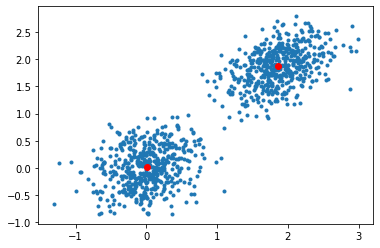

In [2]:
#whitenedData[:, 0] es lo que se conoce como slicing, en este caso se pide la columna 0 como un arreglo (eje x)
#whitenedData[:, 1] la columna dos como un arreglo eje y
plt.scatter(whitenedData[:, 0], whitenedData[:, 1], marker = '.')
#Graficamos los centroides 
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

La función `vq` compara cada vector de observación en la matriz de observables M por N con los centroides y asigna la observación al grupo más cercano. Devuelve el grupo de cada observación y la distorsión. También podemos comprobar la distorsión. Revisemos el grupo de cada observación usando el siguiente código.

In [3]:
# assign each sample to a cluster
cluster, distort = vq(whitenedData,codebook)

Luego ahora podríamos incluir esta nueva información en la gráfica, como por ejemplo usar el cluster para colorear, o que tan lejos estan los puntos de su centroide.

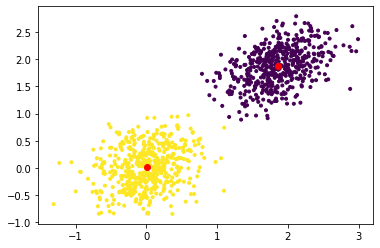

In [4]:
plt.scatter(whitenedData[:, 0], whitenedData[:, 1], marker = '.',c=cluster)
#Graficamos los centroides 
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

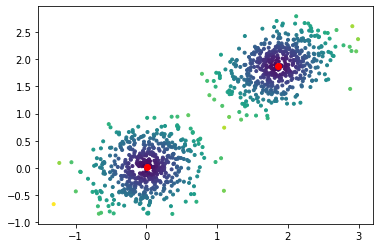

In [5]:
plt.scatter(whitenedData[:, 0], whitenedData[:, 1], marker = '.',c=distort)
#Graficamos los centroides 
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

## Constantes (scipy.constants)

El paquete `scipy.constants` proporciona varias constantes matemáticas y físicas.

In [6]:
#Importamos pi 
from scipy.constants import pi, c

print("SciPy - pi = %.32f"%pi)
print("SciPy - c = %.1f"%c)

SciPy - pi = 3.14159265358979311599796346854419
SciPy - c = 299792458.0


Una forma de buscar dentro de `scipy.constants` es usando la función `find`

In [7]:
from scipy.constants import find
find("alpha")

['alpha particle mass',
 'alpha particle mass energy equivalent',
 'alpha particle mass energy equivalent in MeV',
 'alpha particle mass in u',
 'alpha particle molar mass',
 'alpha particle relative atomic mass',
 'alpha particle-electron mass ratio',
 'alpha particle-proton mass ratio',
 'electron to alpha particle mass ratio']

Y luego se puede ver la propiedad:

In [8]:
import scipy.constants
scipy.constants.physical_constants['alpha particle mass']

(6.6446573357e-27, 'kg', 2e-36)

## Fourier Transformation (scipy.fftpack) 

La transformación de Fourier se calcula en una señal en el dominio del tiempo para comprobar su comportamiento en el dominio de la frecuencia. La transformación de Fourier encuentra su aplicación en disciplinas como el procesamiento de señales y ruido, procesamiento de imágenes, procesamiento de señales de audio, etc. SciPy ofrece el módulo `ftpack`, que permite al usuario calcular transformadas de Fourier rápidas.

__Ejemplo:__ se crea una señal con ruido, que puede ser la salida de un aparato de medición. Cuando se aplica la transformada de Fourier a la señal resultante, proporciona los componentes de frecuencia presentes en la onda sinusoidal.

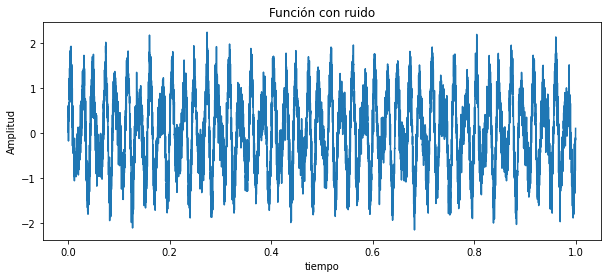

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#Numero de muestras
N = 6000
#Intervalo de muestreo
time_step = 1.0/N
#Frecuancias
frec1 = 45.
frec2 = 70.
#Creamos el arreglo de muestreo temporal
time_vec = np.linspace(0.0, N*time_step, N)
#Creamos una senal ruidosa usando random
sig = np.sin(2* np.pi * frec1 * time_vec)+ 0.5*np.sin(2 * np.pi *frec2 * time_vec) + 0.3 *np.random.randn(time_vec.size)
#Y la graficamos
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(time_vec, sig)
ax.set(title = "Función con ruido", xlabel = "tiempo",ylabel = "Amplitud")
plt.show()

No conocemos la frecuencia de la señal; solo conocemos el paso de tiempo de muestreo de la señal `sig`. Se supone que la señal proviene de una función real, por lo que la transformada de Fourier será simétrica. `scipy.fftpack.fft()` calculará la transformada rápida de Fourier.

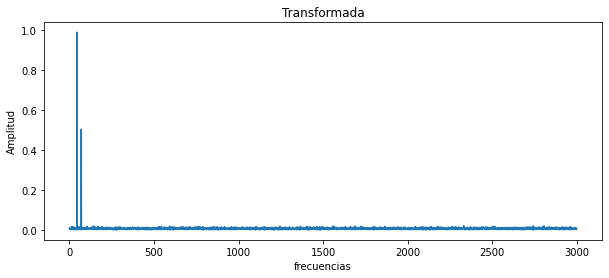

In [10]:
from scipy import fftpack
#Genero las frecuencias de muestreo (solo frecuencias positivas)
sample_freq = np.linspace(0.0, 1.0/(2.0*time_step), int(N/2))
#Calculo la transformada de fourier
sig_fft = fftpack.fft(sig)
#Representacion de frecuencias positivas, luego solo tomo 
pos_sig_fft = 2.0/N*np.abs(sig_fft[0:N//2])
#Grafico
fig1, ax1 = plt.subplots(figsize=(10, 4)) 
ax1.plot(sample_freq, pos_sig_fft)
ax1.set(title = "Transformada", xlabel = "frecuencias",ylabel = "Amplitud")
plt.show()

## Ecuaciones Diferenciales Ordinarias (EDO)
Existen variados métodos para la solución de EDO, algunos de ellos ya los han visto en sus cursos anterionres, por lo que en este documento nos vamos a concentrar en la utilización de los métodos numéricos implementados dentro del paquete _scipy_. 

### Integrales simples
La función `quad` es el caballo de batalla de las funciones de integración de `SciPy`. La integración numérica a veces se llama cuadratura, de ahí el nombre. Normalmente es la opción predeterminada para realizar integrales simples de una función  `f(x)` en un rango fijo dado de `a` a `b`.

$$ \int_ {a} ^ {b} f (x) dx $$

La forma general de `quad` es `scipy.integrate.quad(f, a, b)`, donde "f" es el nombre de la función que se integrará, "a" y "b" son los límites inferior y superior, respectivamente. 

__Ejemplo:__ función gaussiana, integrada en un rango de 0 y 1. Primero necesitamos definir la función $ f (x) = e ^ {- x ^ 2} $, esto se puede hacer usando una expresión lambda y luego llamar al método `quad` en esa función.

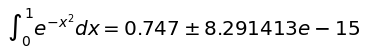

In [11]:
#Importo lo que necesito desde scipy.integrate, matplotlib.pyplot y numpy
from scipy.integrate import quad
import matplotlib.pyplot as plt
from numpy import exp

#Creo la funcion lambda
f = lambda x:exp(-x**2)
#Aplico la funcion quad en el rango 0,1 a la funcion f
i = quad(f, 0, 1)
#Muestro el resultado, con este truco para mostrar latex
text = r'\int_ {0}^{1}e ^ {- x ^ 2}dx ='+ "{0:.3f}".format(i[0])+r'\pm'+"{0:e}".format(i[1])
ax = plt.axes([0,0,0.0,0.1]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.text(0.4,0.4,'$%s$' %text,size=20)
plt.show()

In [12]:
#Si lo estan haciendo en un notebook de Jupiter tambien se puede usando IPython.display
from IPython.display import display, Latex
#Usando el mismo formato que para el truco un matplotlib
display(Latex('$%s$' %text))

<IPython.core.display.Latex object>

### Integrales múltiples
Lo necesario para la integración doble y triple se ha agrupado en las funciones `dblquad`, `tplquad` y `nquad`. Los límites de todas las integrales internas deben definirse como funciones.

__Ejemplo:__ la integral doble,

$$ \int_ {0} ^ {1/2} dy \int_ {0} ^ {\sqrt {1-4y ^ 2}} 16xy \: dx $$

Definimos las funciones f, g y h, usando las expresiones lambda. 

> __NOTA:__ tenga en cuenta que incluso si `g` y `h` son constantes, como pueden serlo en muchos casos, deben definirse como funciones, como se hace aquí para el límite inferior.

In [13]:
#Importo lo que necesito desde scipy.integrate, numpy, math y IPython.display
from scipy.integrate import dblquad
from numpy import exp
from math import sqrt
from IPython.display import display, Latex

#Declaro las funciones lambda
f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : sqrt(1-4*y**2)
i = dblquad(f, 0, 0.5, g, h)

#Muestro el resultado, con este truco para mostrar latex
text = r'\int_ {0} ^ {1/2} dy \int_ {0} ^ {\sqrt {1-4y ^ 2}} 16xy \: dx ='+ "{0:.3f}".format(i[0])+r'\pm'+"{0:e}".format(i[1])

display(Latex('$%s$' %text))

<IPython.core.display.Latex object>

## odeint

El nombre viene de ODE (EDO en ingles) INTeger (integrador en ingles) y es una interfaz para integrar ecuaciones diferenciales. 

__Ejemplo:__ Tenemos la EDO $y'+y=0$ con condición inicial $y(0)=1$, cuya solución exacta es $y(t)=e^{-t}$. Ésta ecuación se debe de escribir de forma correcta para _odeint_ que es $f(y,t)=-y$ (La primera derivada de y respecto al tiempo se cambia por f(y,t)) 

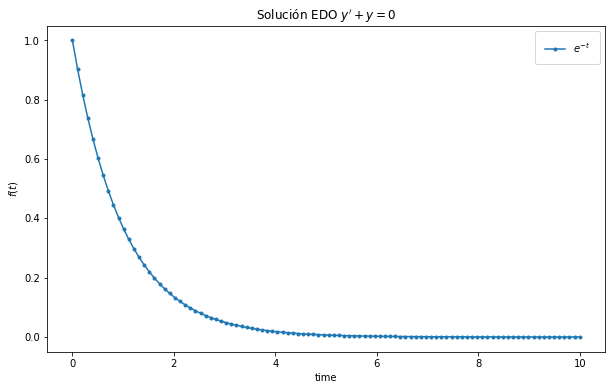

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Definimos la función
def f(y, t):
    return -y
# Las condiciones iniciales
y0=1
# Puesto que es una integración numérica, se debe de probeer 
#un interbalo en el cual se haga dicha integración 
t = np.linspace(0,10, 100) # intervalo de 0 a 10 con 100 puntos
# Realizamos la integración
sol = odeint(f, y0, t)

# Ahora grafiquemos la solución
# Se define el plot
fig, ax = plt.subplots(figsize=(10, 6))
# los valores de los ejes y el marcador 
ax.plot(t, sol, marker = '.')
# accedo a las propiedades de la leyenda y las modifico
ax.legend(["$e^{-t}$"], loc='upper right', borderaxespad=0.5, borderpad=1)

# Se ponen titulo y nombre de los ejes
ax.set(title = "Solución EDO $y'+y=0$",
       xlabel = "time",
       ylabel = "$f(t)$")

plt.show()

## EDO de ordenes superiores
Para utilizar las funciones de _SciPy_, se debe de escribir el problema como un una función que devuleva el valor de la derivada. En caso de tener una EDO de orden mayor que uno, lo que se hace es reducir las ecuaciones de orden.

__Ejemplo:__ Se tiene la EDO $y''+y=0$ con condición inicial $y(0)=1, y'(0)=0$ .Este problema se puede pensar el problema como un vector que contiene la función y su primera derivada $\vec{y}=(y,y')$. 


In [15]:
# Definimos la función
def f(y, t):
    return np.array([y[1], -y[0]])
# Las condiciones iniciales
y0 = np.array([1.0, 0.0])
# interbalo de integración
t = np.linspace(0,10, 100) 
# Realizamos la integración
sol = odeint(f, y0, t)
#Veamos la solución
print(sol)

[[ 1.          0.        ]
 [ 0.99490282 -0.10083841]
 [ 0.97966323 -0.20064884]
 [ 0.95443659 -0.29841379]
 [ 0.91948007 -0.3931366 ]
 [ 0.87515003 -0.48385162]
 [ 0.8218984  -0.56963409]
 [ 0.76026804 -0.64960949]
 [ 0.69088722 -0.72296254]
 [ 0.61446325 -0.78894544]
 [ 0.5317752  -0.84688554]
 [ 0.44366605 -0.89619218]
 [ 0.351034   -0.9363627 ]
 [ 0.25482339 -0.9669876 ]
 [ 0.15601501 -0.98775467]
 [ 0.05561616 -0.99845221]
 [-0.04534966 -0.99897116]
 [-0.14585317 -0.98930623]
 [-0.2448698  -0.96955595]
 [-0.34139014 -0.93992166]
 [-0.43443022 -0.90070547]
 [-0.52304156 -0.85230715]
 [-0.60632082 -0.7952201 ]
 [-0.68341902 -0.73002629]
 [-0.7535502  -0.65739032]
 [-0.81599941 -0.57805268]
 [-0.87013003 -0.49282214]
 [-0.91539023 -0.4025676 ]
 [-0.95131861 -0.30820913]
 [-0.97754889 -0.21070867]
 [-0.99381367 -0.11106016]
 [-0.99994715 -0.01027947]
 [-0.99588681  0.09060602]
 [-0.98167402  0.19056784]
 [-0.95745369  0.28858693]
 [-0.92347272  0.38366407]
 [-0.88007753  0.47483   ]
 

Como se puede ver, la solución es una lista de 100 entradas (una por cada tiempo), y cada entrada contiene una lista de dos entradas, donde la primera entrada corresponde a $y$ y la segunda a $y'$. Grafiquemos las dos solucoiones.

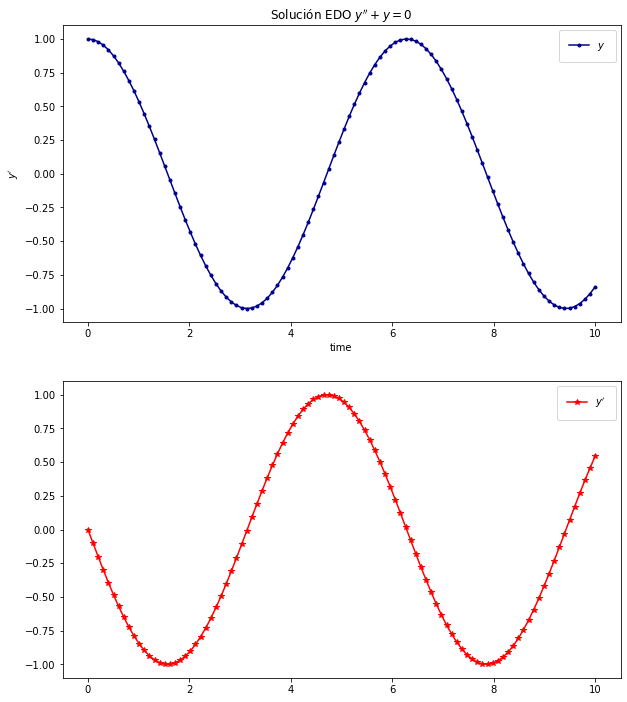

In [16]:
# Se define las graficas
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10, 12))
# los valores de los ejes y el marcador 
ax1.plot(t, sol[:, 0], marker = '.',color = 'darkblue')
ax2.plot(t, sol[:, 1], marker = '*',color = 'red')
# accedo a las propiedades de la leyenda y las modifico
ax1.legend(["$y$"], loc='upper right', borderaxespad=0.5, borderpad=1)
ax2.legend(["$y'$"], loc='upper right', borderaxespad=0.5, borderpad=1)

# Se ponen titulo y nombre de los ejes
ax1.set(title = "Solución EDO $y''+y=0$",
       xlabel = "time",
       ylabel = "$y$")
ax1.set(#title = "Solución EDO $y''+y=0$",
       xlabel = "time",
       ylabel = "$y'$")

plt.show()

### EDO homogeneas
Para el el caso inhomogeneo, se resuelve de manera similar.

__Ejemplo:__ Se tiene la EDO $y'=e^{-t}$ con condiciones iniciales $y(0)=0$

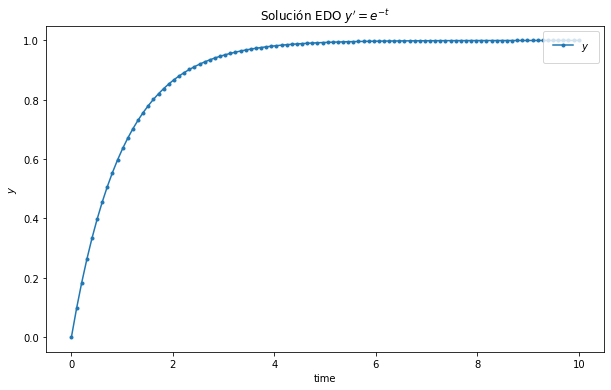

In [17]:
# Definimos la función
def f(y,t):
    return np.exp(-t)
# Las condiciones iniciales
y0=0
#Intervalo de evaluación
t = np.linspace(0,10,100)
#Resuelvo la ED
sol = odeint(f,y0,t)
# Ahora grafiquemos la solución
# Se define el plot
fig, ax = plt.subplots(figsize=(10, 6))
# los valores de los ejes y el marcador 
ax.plot(t, sol, marker = '.')
# accedo a las propiedades de la leyenda y las modifico
ax.legend(["$y$"], loc='upper right', borderaxespad=0.5, borderpad=1)

# Se ponen titulo y nombre de los ejes
ax.set(title = "Solución EDO $y'=e^{-t}$",
       xlabel = "time",
       ylabel = "$y$")

plt.show()